## Task-D: Collinear features and their effect on linear models

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')  


Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/task_d.csv")

In [5]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [6]:
X = data.drop(['target'], axis=1)
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [7]:
#LOGISTIC REGRESSION

data.corr()['target']

x            0.728290
y           -0.690684
z            0.969990
x*x          0.719570
2*y         -0.690684
2*z+3*x*x    0.764729
w            0.641750
target       1.000000
Name: target, dtype: float64

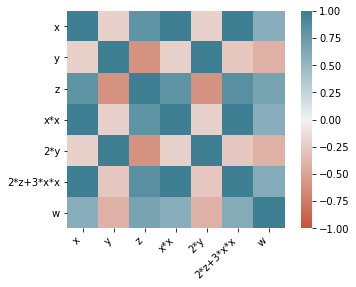

In [8]:
corr = X.corr()
ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

In [9]:
from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV,GridSearchCV
# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=7)
model=LogisticRegression()
model.fit(x_train,y_train)
model.predict(x_test)

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [10]:
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

In [11]:
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X, Y)

In [12]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print(result.best_params_)

Best Score: 1.0
Best Hyperparameters: {'C': 0.008301451461243866, 'penalty': 'none', 'solver': 'newton-cg'}
{'C': 0.008301451461243866, 'penalty': 'none', 'solver': 'newton-cg'}


In [27]:

best_model=LogisticRegression(C=result.best_params_['C'],penalty=result.best_params_['penalty'])


In [ ]:
#3.Getting the weights with the original data
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_


In [28]:
best_model.fit(x_train,y_train)
best_model.predict(x_test)
from sklearn.metrics import accuracy_score
y_pred = best_model.predict(x_test)
score =accuracy_score(y_test,y_pred)
print(score)

1.0


In [ ]:
#4. Modifying original data
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_

In [33]:
Z=X+2.718  # adding noise

x_train,x_test,y_train,y_test=train_test_split(Z,Y,test_size=0.2,random_state=7)
best_model.fit(x_train,y_train)
best_model.predict(x_test)
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
score1 =accuracy_score(y_test,y_pred)
print(score1)


1.0


In [35]:
print(model.coef_)
print(best_model.coef_)


[[ 0.71442928 -0.86249444  1.59850884  0.66005984 -0.86249444  0.78704947
   0.40803273]]
[[ 5.84316097 -7.71317207 13.38046853  3.19587625 -7.71317207  5.09892346
  -7.10509561]]


In [ ]:
5.  Checking deviations in metric and weights 
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

In [36]:
A=score-score1
print(A)
B=model.coef_- best_model.coef_
print(B)

0.0
[[ -5.12873169   6.85067764 -11.78195969  -2.53581641   6.85067764
   -4.31187399   7.51312833]]


In [42]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:10,:])

[ 110.691   89.397 1559.675  105.227   89.397  138.036   68.622]
[[-0.581 -1.013 -0.604 -0.666]
 [-0.894 -1.013 -0.883 -0.917]
 [-1.208 -1.082 -1.151 -1.167]
 [-1.364 -0.944 -1.281 -1.267]
 [-0.738 -1.013 -0.745 -0.793]
 [-0.111 -0.805 -0.165 -0.245]
 [-1.364 -1.013 -1.281 -1.275]
 [-0.738 -0.944 -0.745 -0.784]
 [-1.677 -1.013 -1.532 -1.501]
 [-0.894 -0.944 -0.883 -0.909]]
